### Lab8. Animal Classification using Decision Trees
#### Step1. [Create Dataset]
### Create the following dataset using Excel and save it as CSV file.

In [1]:
import pandas as pd

In [2]:
ani=pd.read_csv('animal.csv')

In [3]:
ani.head()

,Toothed,Hair,Breathes,Legs,Species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Repite
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal


In [4]:
ani.shape

(10, 5)

In [5]:
ani.dtypes

Toothed       bool
Hair          bool
Breathes      bool
Legs          bool
Species     object
dtype: object

In [6]:
ani.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Toothed   10 non-null     bool  
 1   Hair      10 non-null     bool  
 2   Breathes  10 non-null     bool  
 3   Legs      10 non-null     bool  
 4   Species   10 non-null     object
dtypes: bool(4), object(1)
memory usage: 248.0+ bytes


In [7]:
ani.dtypes.value_counts()

bool      4
object    1
dtype: int64

In [8]:
ani.columns

Index(['Toothed', 'Hair', 'Breathes', 'Legs', 'Species'], dtype='object')

### Step2. [Model building using ID3] 
#### Import your data set 

In [9]:
import pandas as pd
from sklearn import tree
import csv
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

#### Create DT model using ‘entropy’ criterion

In [10]:
DecisionTreeClassifier(criterion='entropy')

DecisionTreeClassifier(criterion='entropy')

In [13]:
laben = LabelEncoder()
ani["Label"] = laben.fit_transform(ani["Species"]) 
ani

,Toothed,Hair,Breathes,Legs,Species,Label
0,True,True,True,True,Mammal,0
1,True,True,True,True,Mammal,0
2,True,False,True,False,Repite,1
3,False,True,True,True,Mammal,0
4,True,True,True,True,Mammal,0
5,True,True,True,True,Mammal,0
6,True,False,False,False,Repite,1
7,True,False,True,False,Repite,1
8,True,True,True,True,Mammal,0
9,False,False,True,True,Repite,1


In [15]:
categories = list(laben.inverse_transform([0,1]))
categories

['Mammal', 'Repite']

#### Perform training and testing 

In [16]:
X = ani.drop(['Label','Species'],axis=1)

In [17]:
y = ani.Label

In [18]:
X

,Toothed,Hair,Breathes,Legs
0,True,True,True,True
1,True,True,True,True
2,True,False,True,False
3,False,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,False,False,False
7,True,False,True,False
8,True,True,True,True
9,False,False,True,True


In [19]:
y

0    0
1    0
2    1
3    0
4    0
5    0
6    1
7    1
8    0
9    1
Name: Label, dtype: int32

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [21]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [22]:
y_predict = clf.predict(X_test)
y_predict

array([1, 0, 0, 0])

#### Print accuracy and classification report.

In [23]:
print("Accuracy of train :",clf.score(X_train,y_train))
print("Accuracy of test  :",clf.score(X_test,y_test))
print('\n')
print(classification_report(y_test,y_predict))

Accuracy of train : 1.0
Accuracy of test  : 0.75


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



#### Visualize your DT model using graphviz 

In [24]:
with open("tree1.dot", 'w') as f:
    f = tree.export_graphviz(clf,out_file=f,max_depth = 4,impurity = False,feature_names = X.columns.values,class_names = categories,filled= True )

Install necessary package for visualization. The following sample code will help you to understand 
visualization. 

#### Now open tree1.txt file which will be created in your working directory then Copy and paste the code to http://webgraphviz.com/
### Another Way to visualize

[Text(167.4, 163.07999999999998, 'X[3] <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]')]

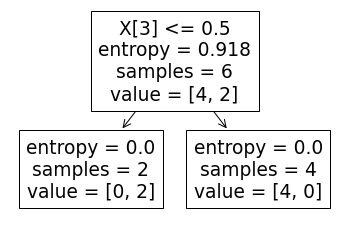

In [25]:
%matplotlib inline
tree.plot_tree(clf)

### Step3. [Create a Test Set] 
### Create a testing csv file with 3 samples as below. (columns 2, 3, 4, 5 only)

In [26]:
import csv
fields = ['Name','Toothed', 'Hair', 'Breathes', 'Legs', 'Species'] 
    

rows = [ ['Turtile','FALSE','FALSE','TRUE','FALSE','Reptile'], 
         ['Blue Whales','FALSE','TRUE','TRUE','TRUE','Mammal'], 
         ['Crocodile','TRUE','FALSE','TRUE','TRUE','Reptile'] ] 
    
filename = "testing.csv"


with open(filename, 'w') as file: 
  
    writer = csv.writer(file) 
        
    
    writer.writerow(fields) 
        
     
    writer.writerows(rows)

In [27]:
teset = pd.read_csv('testing.csv')
teset

,Name,Toothed,Hair,Breathes,Legs,Species
0,Turtile,False,False,True,False,Reptile
1,Blue Whales,False,True,True,True,Mammal
2,Crocodile,True,False,True,True,Reptile


In [30]:
teset["Label"] = laben.fit_transform(teset["Species"]) 
teset

,Name,Toothed,Hair,Breathes,Legs,Species,Label
0,Turtile,False,False,True,False,Reptile,1
1,Blue Whales,False,True,True,True,Mammal,0
2,Crocodile,True,False,True,True,Reptile,1


### Step4. [Perform prediction] 
Use your ID3 DT model that you created before and predict labels for this test set. 
Check your predictions. Correct? 

In [31]:
step4 = teset.drop(['Name','Species','Label'],axis=1)
y_predi = clf.predict(step4)
y_predi

array([1, 0, 0])

In [32]:
accuracy_score(teset.Label,y_predi)

0.6666666666666666

### Step5. [Build CART Decision Tree Model] 
#### Now, you are going to build a new CART decision tree using criterion=’gini’.
#### Train you model with full training data (No, train test split, this time) 
#### Predict samples for the test file 
#### Visualize your CART DT using graphviz 

In [33]:
clf1 = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=42)
clf1.fit(X,y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [34]:
clf1.predict(step4)

array([1, 0, 1])

In [35]:
with open("tree2.txt", 'w') as f:
    f = tree.export_graphviz(clf1,out_file=f,max_depth = 4,impurity = False,feature_names = X.columns.values,class_names = categories,filled= True )

#### Now open tree2.txt file which will be created in your working directory then Copy and paste the code to http://webgraphviz.com/
### Another Way to visualize

[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

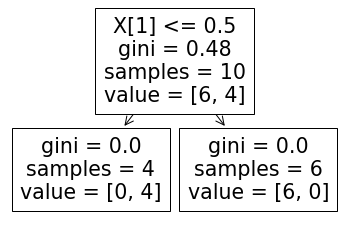

In [36]:
tree.plot_tree(clf1)

### Step6. [Buid DT with Zoo dataset]
####  Import, build model using ID3 and CART, train and test accuracy. Print classification report. Visualize your trees. 

In [37]:
ani1 = pd.read_csv("zoo.csv")

In [38]:
ani1.head()

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [39]:
ani1.shape

(101, 18)

In [40]:
ani1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      101 non-null    object
 1   hair      101 non-null    int64 
 2   feathers  101 non-null    int64 
 3   eggs      101 non-null    int64 
 4   milk      101 non-null    int64 
 5   airborne  101 non-null    int64 
 6   aquatic   101 non-null    int64 
 7   predator  101 non-null    int64 
 8   toothed   101 non-null    int64 
 9   backbone  101 non-null    int64 
 10  breathes  101 non-null    int64 
 11  venomous  101 non-null    int64 
 12  fins      101 non-null    int64 
 13  legs      101 non-null    int64 
 14  tail      101 non-null    int64 
 15  domestic  101 non-null    int64 
 16  catsize   101 non-null    int64 
 17  type      101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [41]:
ani1.dtypes

name        object
hair         int64
feathers     int64
eggs         int64
milk         int64
airborne     int64
aquatic      int64
predator     int64
toothed      int64
backbone     int64
breathes     int64
venomous     int64
fins         int64
legs         int64
tail         int64
domestic     int64
catsize      int64
type         int64
dtype: object

In [42]:
ani1.dtypes.value_counts()

int64     17
object     1
dtype: int64

In [43]:
ani1.columns

Index(['name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [44]:
X_1 = ani1.drop(['name','type'],axis=1)
y_1 = ani1.type

In [45]:
X_1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [46]:
y_1

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [47]:
X__train,X__test,y__train,y__test = train_test_split(X_1,y_1,test_size=0.33,random_state=0)

In [48]:
clf3 = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=52)
clf3.fit(X__train,y__train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=52)

In [49]:
clf3.predict(X__test)

array([4, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 7, 2, 4, 2, 4,
       1, 2, 1, 1, 1, 2, 4, 4, 4, 4, 4, 1], dtype=int64)

In [50]:
clf4 = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=42)
clf4.fit(X__train,y__train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler

In [55]:
scl = StandardScaler()

In [56]:
st_sc = scale.fit_transform(X__train)

In [57]:
st_sc1 = scale.transform(X__test)

In [60]:
print("Train accuracy :",clf4.score(st_sc,y__train))
print("Test accuracy  :",clf4.score(st_sc1,y__test))

Train accuracy : 0.9253731343283582
Test accuracy  : 0.8235294117647058


In [67]:
ani1.type.value_counts(dropna=False)

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [70]:
with open("tree3.txt", 'w') as f:
    f = tree.export_graphviz(clf4,out_file=f,max_depth = 16,impurity = False,feature_names = X_1.columns.values,class_names = ['1','2','3','4','5','6','7'] ,filled= True )

Now open tree3.txt file which will be created in your working directory then Copy and paste the code to http://webgraphviz.com/

[Text(239.14285714285714, 195.696, 'X[3] <= 0.5\ngini = 0.736\nsamples = 67\nvalue = [29, 14, 1, 6, 3, 6, 8]'),
 Text(191.31428571428572, 152.208, 'X[1] <= 0.5\ngini = 0.763\nsamples = 38\nvalue = [0, 14, 1, 6, 3, 6, 8]'),
 Text(143.4857142857143, 108.72, 'X[11] <= 0.5\ngini = 0.747\nsamples = 24\nvalue = [0, 0, 1, 6, 3, 6, 8]'),
 Text(95.65714285714286, 65.232, 'X[4] <= 0.5\ngini = 0.66\nsamples = 18\nvalue = [0, 0, 1, 0, 3, 6, 8]'),
 Text(47.82857142857143, 21.744, 'gini = 0.556\nsamples = 13\nvalue = [0, 0, 1, 0, 3, 1, 8]'),
 Text(143.4857142857143, 21.744, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 5, 0]'),
 Text(191.31428571428572, 65.232, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 6, 0, 0, 0]'),
 Text(239.14285714285714, 108.72, 'gini = 0.0\nsamples = 14\nvalue = [0, 14, 0, 0, 0, 0, 0]'),
 Text(286.9714285714286, 152.208, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0, 0, 0, 0, 0]')]

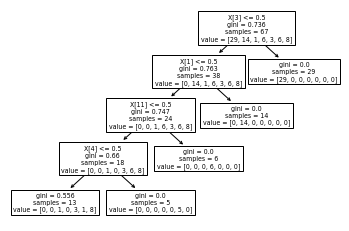

In [77]:
tree.plot_tree(clf4)